# Introduction to Autonomous Driving 2018
## Localization of a robot
### University of Applied Science Zwickau, Computer science

----

# Goal: Localization of a robot with inaccurate (i.e., noisy) color sensor and inaccurate robot movement

After successfully implementing the robot localization in part 1, we will now discuss how to deal with inaccurate measurement and movement of the robot.

In [1]:
# Setup (please ignore)
%matplotlib inline

from helper import *

ModuleNotFoundError: No module named 'matplotlib'

## Step 1: Handling sensor noise while updating the position

The color sensor does not always measure precisely. We need to integrate the knowledge, that the sensor will only provide an accurate measurement in 10% of the cases, into our program. In 10% of the cases the sensor will identify a white cell as a black one and vice versa.

In [13]:
def update_probabilities_inaccurate_sensor(map, probabilities, measured_color):
	# 1. Calculate new probabilities of the robot's position based on the previous and the current measured cellcolor
	
    # Probabilities for accurate and inaccurate measurements by the sensor
	p_accurate = 0.9
	p_inaccurate = 1 - p_accurate 

	new_probabilities = []
	for index, cellcolor in enumerate(map):
		probability = probabilities[index]
		equal_color = (cellcolor == measured_color)
		if equal_color:
			new_probability = probability * p_accurate
		else:
			new_probability = probability * p_inaccurate
		new_probabilities.append(new_probability)

	# 2. Normalize
	s = sum(new_probabilities)
	for i in range(len(new_probabilities)):
		new_probabilities[i] = new_probabilities[i] / s
	
	return new_probabilities

----

## 1. Exercise

* Use the new procedure `update_probabilities_inaccurate_sensor` to update the position.
* Use `ausgabe_grafisch` instead of `ausgabe`.
* Use the familiar procedure `move_one_cell_right` to move the robot to the next cell.

In [14]:
def move_one_cell_right(probabilities):
    return shift_list(probabilities, 1)

Initial probabilities:


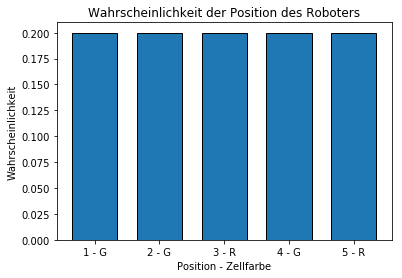

In [15]:
map = ['G', 'G', 'R', 'G', 'R']
probabilities = [ 0.2, 0.2, 0.2, 0.2, 0.2 ]

print("Initial probabilities:")
ausgabe_grafisch(map, probabilities)

Measurement 1: cell has the color green


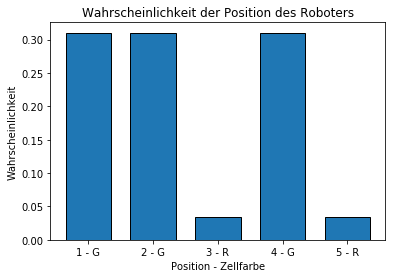

In [16]:
print("Measurement 1: cell has the color green")
probabilities = update_probabilities_inaccurate_sensor(map, probabilities, 
                                                             measured_color='G')
ausgabe_grafisch(map, probabilities)

Movement 1: one cell to the right


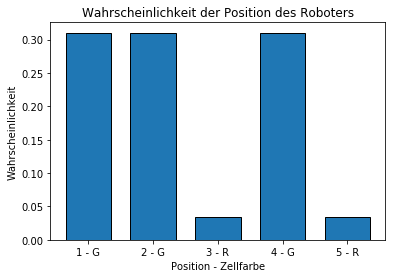

In [17]:
print("Movement 1: one cell to the right")
vermutungen = move_one_cell_right(probabilities)
ausgabe_grafisch(map, probabilities)

In [18]:
print("Measurement 2: cell has the color green")
# TODO

Measurement 2: cell has the color green


In [19]:
print("Movement 2: one cell to the right")
# TODO

Movement 2: one cell to the right


In [20]:
print("Measurement 3: cell has the color red")
# TODO

Measurement 3: cell has the color red


----

## Excercise 2:

What happens when you repeatedly measure the cellcolor without moving the robot?

----
----

## Step 2: Handling inaccurate movement while updating the position

The probability for the robot when moving to its left or right
* to end up in the anticipated neighborcell is 90% (accurate movement),
* to remain in the current cell is 5% (inaccurate movement, undershooting) or
* to move too far, ending up one cell past the anticipated cell is 5% aswell (inaccurate movement, overshooting).

This results in the updated (and generalized) movement procedure. The parameter `steps` is used to indicate the amount of cells that the robot is supposed to move to the left or right. A positive value will move the robot to the right by the given amount, a negative one to the left.

In [21]:
def move_inaccurate(probabilities, steps):
    p_overshoot = 0.05
    p_undershoot = 0.05
    p_accurate = 1 - p_overshoot - p_undershoot
    new_probabilities = []
    
    amount_probabilities = len(probabilities)
    for i in range(amount_probabilities):
        index = (i-steps) % amount_probabilities
        next_index = (index+1) % amount_probabilities
        prev_index = (index-1) % amount_probabilities
        new_probability = p_exakt * vermutungen[index]
        new_probability = new_probability + p_overshoot  * probabilities[next_index]
        new_probability = new_probability + p_undershoot * probabilities[prev_index]
        new_probabilities.append(new_probability)
    
    return new_probabilities

----

## 3. Übung: Use inaccurate movement

Use the procedure `move_inaccurate` as follows:

    print("Movement X: 1 cell to the left")
    probabilities = move_inaccurate(probabilities, -1)
    ausgabe_grafisch(map, probabilities)

Initial probabilities:


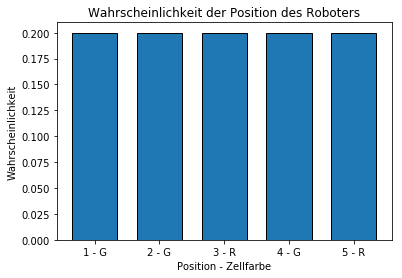

In [22]:
map = ['G', 'G', 'R', 'G', 'R']
probabilities = [1/len(map)] * len(map)

print("Initial probabilities:")
ausgabe_grafisch(map, probabilities)

In [23]:
print("Measurement 1: cell has the color TODO")
# TODO

Measurement 1: cell has the color TODO


In [24]:
print("Movement 1: moving one cell in the direction TODO")
# TODO

Movement 1: moving one cell in the direction TODO


In [25]:
print("Measurement 2: cell has the color TODO")
# TODO

Measurement 2: cell has the color TODO


In [26]:
print("Movement X: moving one cell in the direction TODO")
# TODO

Movement X: moving one cell in the direction TODO


----

## Excercise 4: Just moving, without measuring the color

1. Localize the robot as adequately as possible
2. What happens, when you repeatedly move the robot with the new procedure that compensates inaccurate movement, without measuring the cell color? Why?


----
----